Proszę zaimplementować w Julia kod realizujący metodę BiCG. Program *.jl powinien implementować funkcję zgodnie z interfejsem:

function mybicg(A, b, x0, maxiter=100, error=1e-6)
  ...
  return x, R, X
end
gdzie x - to wektor rozwiązania, X - macierz zawierająca wektory rozwiązań z poszczególnych iteracji, R - wektor wartości residuum w kolejnych iteracjach.

Program powinien również obejmować kod testujący oraz prezentujący przebieg zbieżności rozwiązania (wartości residuum w poszczególnych iteracjach).

In [65]:
using Plots
using LinearAlgebra
using BenchmarkTools

In [69]:
function mybicg(A, b, x₀, maxiter=100, error=1e-6)
    R = Array{Float64}(undef,0)
    X = Array{Vector{Float64}}(undef,0)
    rₖ = b - A*x₀
    r̆ₖ = rₖ
    pₖ = rₖ
    p̆ₖ = rₖ
    xₖ = x₀
    x̆ₖ = x₀
    k = 0
    
    while (k < maxiter && norm(rₖ) > error)
        αₖ = rₖ'*r̆ₖ / (pₖ'*A*p̆ₖ)
        xₖ = xₖ + αₖ*pₖ
        push!(X, xₖ)
        rₖ₁ = rₖ - αₖ*A*pₖ
        r̆ₖ₁ = r̆ₖ - αₖ*A'*p̆ₖ
        βₖ = rₖ₁'*r̆ₖ₁ / (rₖ'*r̆ₖ)
        pₖ = rₖ₁ + βₖ*pₖ
        p̆ₖ = r̆ₖ₁ + βₖ*p̆ₖ
        rₖ = rₖ₁
        r̆ₖ = r̆ₖ₁
        push!(R, norm(rₖ))
        k += 1
    end
    
    x = xₖ;
    
    return x, R, X
end

mybicg (generic function with 3 methods)

In [70]:
A = [1 -4.7 -1
    -4.7 -0.1 -2
    -1 -2 5]
x = [1;1;1]
b = A*x 

x0 = [-1.5;1.75;-2]
xm, Rm, Xm = mybicg(A,b,x0) 
println("xm = $xm")
println("Rm = $Rm")
println("Xm = $Xm")

xm = [0.9999999999999992, 1.0000000000000002, 0.9999999999999997]
Rm = [17.628375578718465, 0.45254841257828354, 3.694412041162093e-15]
Xm = [[-0.8381769847426837, -2.1170154693134116, 1.0629825499512169], [0.9369183408834385, 1.0390893425176007, 1.0598992799706177], [0.9999999999999992, 1.0000000000000002, 0.9999999999999997]]


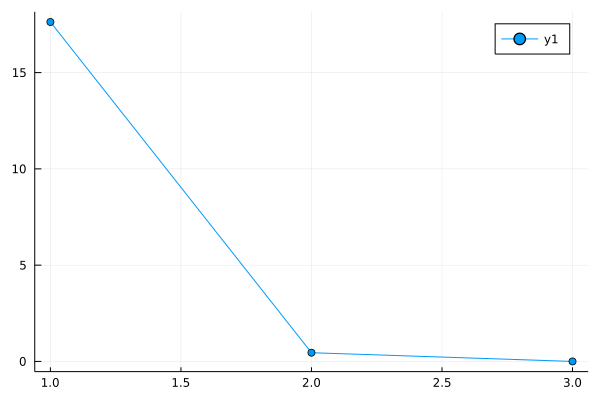

In [71]:
plot(Rm, markershape=:circle)